In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

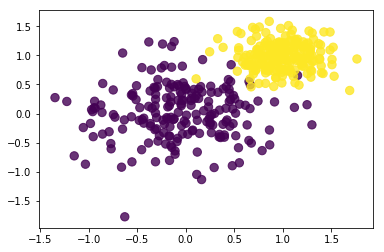

In [2]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

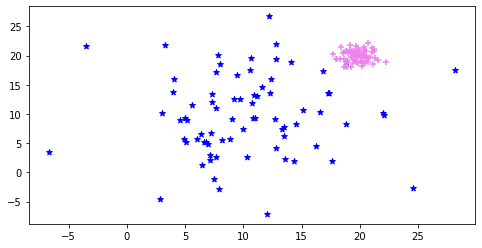

In [2]:
#nrnd = np.random.normal(loc=0., scale=1., size=(100,)) # generate 100 random numbers using a Gaussian pdf

random = np.arange(75)
#ho fatto due np array
ds1 = np.random.normal(10, 6, size=(random.size, 2)) #this gaussian has mean=10 and stdev=6
ds2 = np.random.normal(20, 1, size=(random.size, 2)) #this gaussian has mean=20 and stdev=1

#ho trasformato in dataframe
df1 = pd.DataFrame(ds1, columns = ['x1', 'y1'])
df2 = pd.DataFrame(ds2, columns = ['x2','y2'])

#creating the plot
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.scatter(x=df1['x1'], y=df1['y1'], marker = '*', c = 'blue')
ax1.scatter(x=df2['x2'], y=df2['y2'], marker = '+', c = 'violet')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features) OK
* Convert the content to a Pandas Dataframe OK
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2 OK
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. OK

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable OK
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
This is my clean dataframe
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]
this is the array [ 0.          0.18181818  0.36363636  0.54545455  0.72727273  0.90909091
  1.09090909  1.27272727  1.45454545  1.63636364  1.81818182  2.
  2.18181818  2.36363636  2.54545455  2.72727273  2.90909091  3.09090909
  3.27272727  3.45454545  3.63636364  3.81818182  4.          4.18181818
  4.36363636  4.54545455  4.72727273  4.90909091  5.09090909  5.27272727
  5.45454545  5.63636364  5.81818182  6.          6.1818181

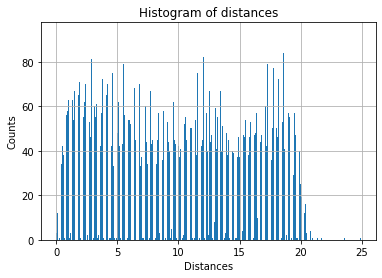

In [84]:
#downloading the file (only once then I can comment this line to avoid downloading the file several times)
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /

filename = 'residuals_261.pkl'

#opening the pickle file
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()
#printing  pickle file
print(new_dict)

#converting the pickle in dictionary
dictionary = dict(new_dict.item())
#dictionary["residuals"] -> first variable
#dictionary["distances"] -> second variable

#converting dictionary to dataframe
res_pd = pd.DataFrame(dictionary)
res_pd

#selecting only entries with |residuals|<2 -> taking only residuals<2 and residuals>-2
res_clean = res_pd[res_pd['residuals']<2]
#res_clean
res_clean2 = res_clean[res_clean['residuals']>-2]
print("This is my clean dataframe\n",res_clean2) 

#plotting data and linear regression with seaborn
#sns.regplot(x="distances", y="residuals", data= res_clean2, y_jitter=0.1, x_jitter=0.1, line_kws = {'color':'red'}, scatter_kws={'alpha':0.5, 's' : 1})

#creating histogram for distance variable -> NON credo si faccia così
histo = res_clean2.hist('distances', bins = 500,sharey=True, sharex=True)
plt.title("Histogram of distances")
plt.ylabel('Counts')
plt.xlabel('Distances')

#making an array of bin centers -> NON credo si faccia così
x = bins[:]
print("This is the array of bin centers",x)




3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


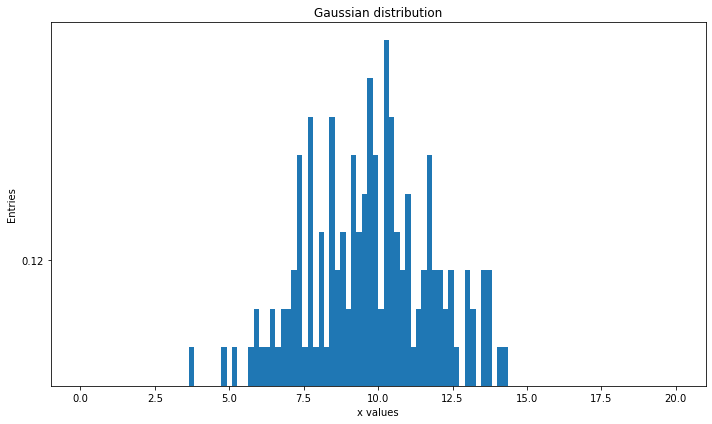

In [29]:
#creating a numpy array x of lenght N 
x = np.random.normal(10, 2, size=150) #mean=50 stdev=6

fig, ax = plt.subplots(figsize=(10, 6))
#mettere giusto numero di bin
h, bins, _ = plt.hist(x, bins=110, range=(0, +20), density=True, cumulative=False)

#settare titoli
ax.set_title('Gaussian distribution')
ax.set_xlabel('x values')
ax.set_ylabel('Entries')

#settare y ticks
ytick_loc = [0.12]
ax.set_yticks(ytick_loc)
fig.tight_layout()